<a href="https://colab.research.google.com/github/Shreyaprashanth/Samsung__Innovation__Campus/blob/main/COUNT_DIGITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MultiClassLogisticRegression:

    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres

    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False):
        np.random.seed(rand_seed)
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self

    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose:
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1

    def predict(self, X):
        return self.predict_(self.add_bias(X))

    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))

    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)

    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]

    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)

    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

0.9988870339454646


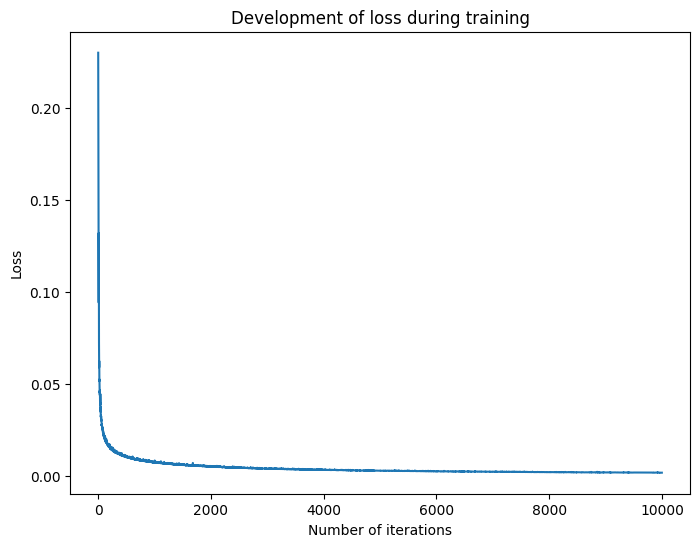

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
lr = MultiClassLogisticRegression(thres=1e-5)
lr.fit(X,y,lr=0.0001)
print(lr.score(X, y))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be converted
 |  (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solvers s

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a multi-class dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
########################################################################
# Instantiate and train a multinomial logistic regression model
# Choose a solver that supports multinomial (e.g., 'lbfgs', 'saga', 'newton-cg')
model = LogisticRegression(multi_class='multinomial',
                           solver='lbfgs',
                           max_iter=1000)
#######################################################################
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model accuracy: 0.97


0.9654980523094046


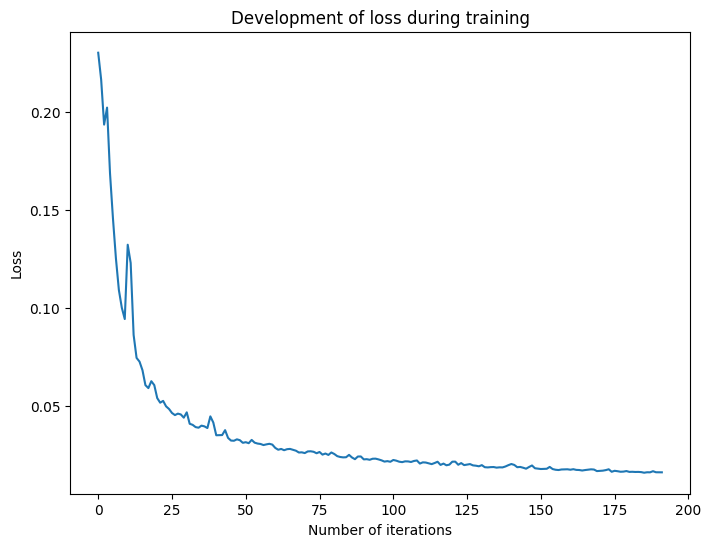

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# import some data to play with
digits = datasets.load_digits()
X = digits.data  # we only take the first two features.
Y = digits.target
lr = MultiClassLogisticRegression()
lr.fit(X,Y, lr=0.0001)

pre = lr.predict_classes(X)
print(lr.score(X,Y))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

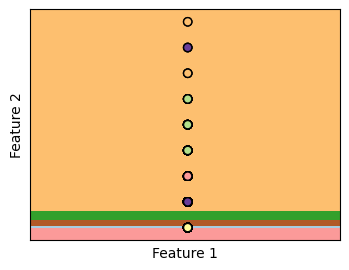

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
digits = datasets.load_digits()
X = digits.data[:, :2]  # we only take the first two features.
Y = digits.target

logreg = MultiClassLogisticRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict_classes(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

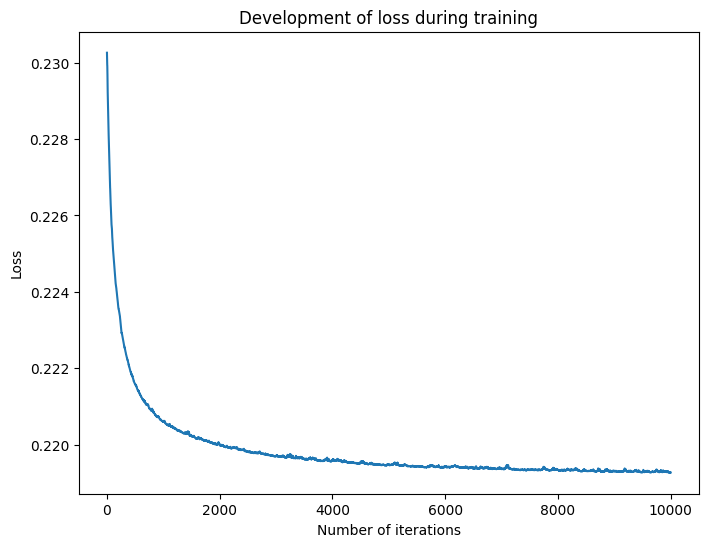

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(logreg.loss)), logreg.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()